# Python Data Analysis: Home Exam (2021-2022)

> + **Allocated time:** 10 days
> + **Send your final notebook** at [romain.madar@cern.ch](mailto:romain.madar@cern.ch) and [louis.vaslin@clermont.in2p3.fr](mailto:louis.vaslin@clermont.in2p3.fr) before **27/09/2020 23:59:59 CEST** 
>
> **Comment 1**: the final mark will be a number between 0 (very bad) and 20 (very good). The evaluation of this exam takes into account the correctness of the answers, but also the clarity of the explanations and the quality of the code. *There is no required knowledge about Parkinson disease or general medecine to answer the questions asked in this exam.*
>
> **Comment 2**: discussions are encouraged,  with the professor (*via* email or just passing by my office) and between students. However you should make sure to demonstrate that *you understand what is in your notebook*.
> 
> This exam is split int 2 parts: (1) data exploration and (2) building a predictive model

## A bit of context ...

The dataset considered in this project describe 120 years of olympic games, including all the Games from Athens 1896 to Rio 2016. The data contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:
+ `ID` - Unique number for each athlete
+ `Name` - Athlete's name
+ `Sex` - M or F
+ `Age` - Integer
+ `Height` - In centimeters
+ `Weight` - In kilograms
+ `Team` - Team name
+ `NOC` - National Olympic Committee (3-letter code)
+ `Games` - Year and season
+ `Year` - Integer
+ `Season` - Summer or Winter
+ `City` - Host city
+ `Sport` - Sport
+ `Event` - Event
+ `Medal` - Gold, Silver, Bronze, or NA

The goal of this project is to explore these data from different points of view, in order to isolate some tendencies. In the last part of the projet, we will try to build a predictive model based on these data.

## Packages importation and data

### Import the usual packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Disable some warning due to the tool evolution
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Plot settings
import matplotlib as mpl
mpl.rcParams['legend.frameon'  ] = False
mpl.rcParams['legend.fontsize' ] = 'xx-large'
mpl.rcParams['xtick.labelsize' ] = 16
mpl.rcParams['ytick.labelsize' ] = 16
mpl.rcParams['axes.titlesize'  ] = 18
mpl.rcParams['axes.labelsize'  ] = 18
mpl.rcParams['lines.linewidth' ] = 2.5
mpl.rcParams['lines.markersize'] = 10

### Import the data

The data file can be found in `lecture-python/data` directory and is called `athlete_events.csv`. This file in the csv format. Create a pandas dataframe `df` from the csv file, and print the first 5 rows of the data.

In [3]:
df = pd.read_csv('../../data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 1. Data exploration (13 pts)

**1.1 Basic quantities.** The first step to get familiar with the dataset is to look at basic quantities. Please provide:
 1. List of years with olympic games
 1. number of countries over the entire period
 1. number of sports over the entire period
 1. number of sport for each season, over the entire period
 1. fraction of male and female over the entire period

In [4]:
# Useful function
def nUniqueVal(df, col):
    a = np.unique(df[col].array)
    return a.size

In [5]:
# 1. List of years
ys = np.unique(df['Year'].array)
print(f'{ys.size} years: {np.sort(ys)}')

35 years: [1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016]


In [6]:
# 2. Number of countries
cName = 'NOC'
print(f'Number of countries: {nUniqueVal(df, cName)}')

Number of countries: 230


In [7]:
# 3. Number of sports
sName = 'Sport'
print(f'Number of sports: {nUniqueVal(df, sName)}')

Number of sports: 66


In [8]:
# 4. Print sports by season
sTot = np.size(np.unique(df['Sport']))
for k, d in df.groupby('Season'):
    s = np.unique(d['Sport'].array)
    print(f'{k}: {s.size} ({s.size/sTot*100:2.0f}%)')

Summer: 52 (79%)
Winter: 17 (26%)


In [9]:
# 5. Number (and fractions) of men and women
for k, d in df.groupby('Sex'):
    print(f'{k}: {d.size} ({d.size/df.size*100:2.0f}%)')

F: 1117830 (27%)
M: 2948910 (73%)


**1.2 Biological data.** A first point of view to explore these data could be to focus on biological caracteristics of athletes. In that purpose, produce the following plots:

 1. Weight *v.s.* height *v.s.* age for both men and women (best graphical representation to be chosen)
 1. Height *v.s* time for both men and women
 1. Weight *v.s* time for both men and women
 1. Age *v.s* time for both men and women

What do you observe for the last 3 points? How can you explain this observation?

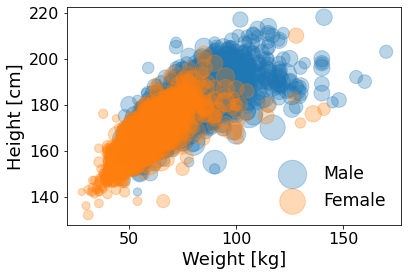

In [10]:
# Comparing Weight v.s. height for women and men

# Get data only for Women and men
dfW, dfM = df[df.Sex=='F'], df[df.Sex=='M']
ww, hw, aw = dfW['Weight'].array, dfW['Height'].array, dfW['Age'].array
wm, hm, am = dfM['Weight'].array, dfM['Height'].array, dfM['Age'].array

# Only take one observation over N
s = lambda a: a[::30]

# Produce the plot
plt.scatter(s(wm), s(hm), alpha=0.3, s=0.3*s(am)**2, label='Male')
plt.scatter(s(ww), s(hw), alpha=0.3, s=0.3*s(aw)**2, label='Female')
plt.xlabel('Weight [kg]')
plt.ylabel('Height [cm]')
plt.legend();

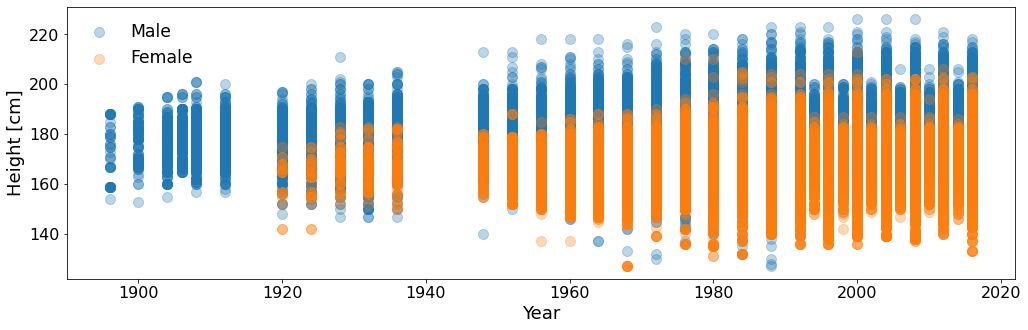

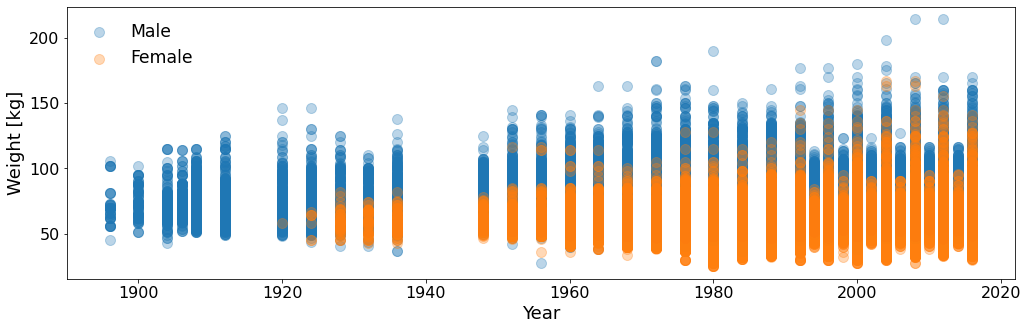

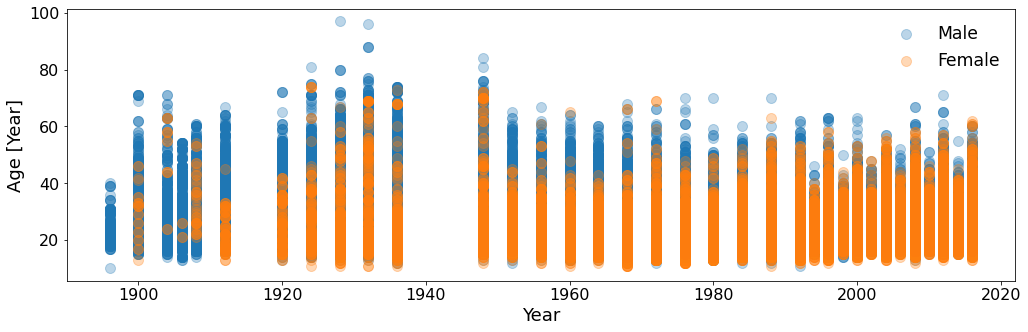

In [11]:
# Comparing Weight and height time evolution for women and men
dfW, dfM = df[df.Sex=='F'], df[df.Sex=='M']
ww, hw, tw, aw = dfW['Weight'].array, dfW['Height'].array, dfW['Year'].array, dfW['Age'].array
wm, hm, tm, am = dfM['Weight'].array, dfM['Height'].array, dfM['Year'].array, dfM['Age'].array

# Plotting result
plt.figure(figsize=(17, 5))
plt.scatter(tm, hm, alpha=0.3, label='Male')
plt.scatter(tw, hw, alpha=0.3, label='Female')
plt.xlabel('Year')
plt.ylabel('Height [cm]')
plt.legend()

plt.figure(figsize=(17, 5))
plt.scatter(tm, wm, alpha=0.3, label='Male')
plt.scatter(tw, ww, alpha=0.3, label='Female')
plt.xlabel('Year')
plt.ylabel('Weight [kg]')
plt.legend()

plt.figure(figsize=(17, 5))
plt.scatter(tm, am, alpha=0.3, label='Male')
plt.scatter(tw, aw, alpha=0.3, label='Female')
plt.xlabel('Year')
plt.ylabel('Age [Year]')
plt.legend();

There are two observations to be made:
 1. the spread of the distribution increase with time
 2. there are OG every 2 years instead of 4 at the end, where there are less dispersion of weight/height
 
The two observation have the same origin: the number of sports, which increase both in time and between summer and winter OGs.

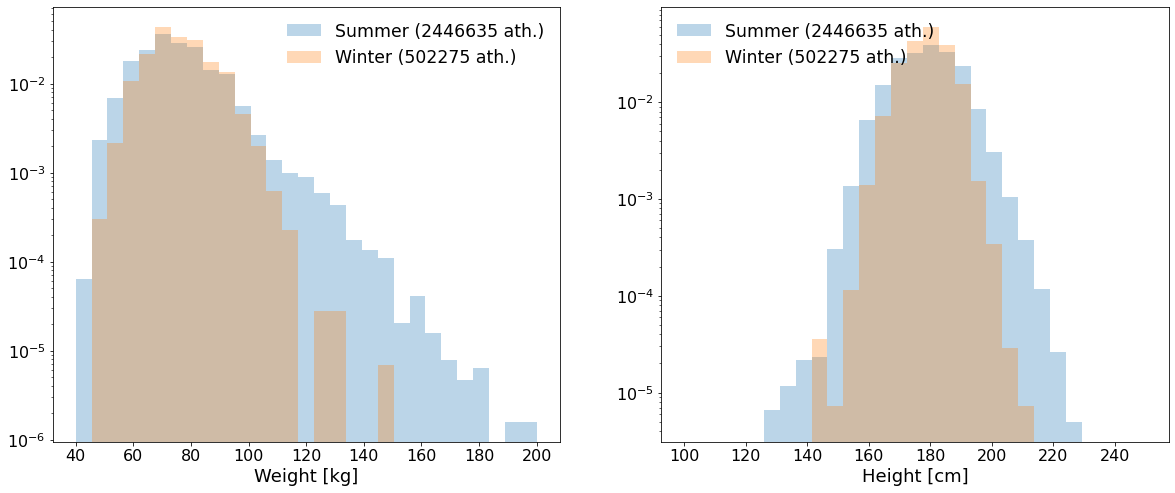

In [12]:
# Getting the data to comparing mens weight by seasons
dfMwin, dfMsum = dfM[dfM['Season']=='Winter'], dfM[dfM['Season']=='Summer']

# Histogram style
histW_style = {'bins':np.linspace( 40, 200, 30), 'alpha': 0.3, 'density': True, 'log': True}
histH_style = {'bins':np.linspace(100, 250, 30), 'alpha': 0.3, 'density': True, 'log': True}

# Plotting
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.hist(dfMsum['Weight'], label=f'Summer ({dfMsum.size} ath.)', **histW_style)
plt.hist(dfMwin['Weight'], label=f'Winter ({dfMwin.size} ath.)', **histW_style)
plt.xlabel('Weight [kg]')
plt.legend();
plt.subplot(1, 2, 2)
plt.hist(dfMsum['Height'], label=f'Summer ({dfMsum.size} ath.)', **histH_style)
plt.hist(dfMwin['Height'], label=f'Winter ({dfMwin.size} ath.)', **histH_style)
plt.xlabel('Height [cm]')
plt.legend();

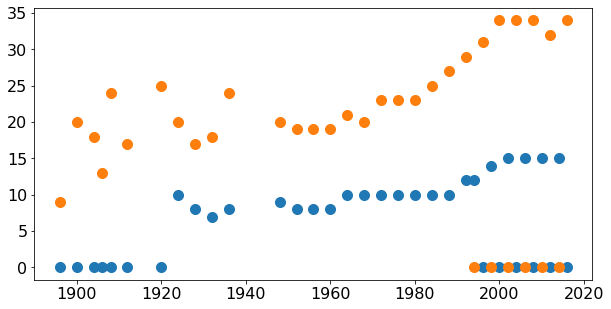

In [13]:
# Number of sport as function of time
Nyears = nUniqueVal(df, 'Year')
NsportsW, NsportsS = np.zeros(shape=(Nyears)), np.zeros(shape=(Nyears))
Years = np.zeros(shape=(Nyears))
for i, (y, d) in enumerate(df.groupby('Year')):
    Years[i] = y
    dW, dS = d[d['Season']=='Winter'], d[d['Season']=='Summer']
    NsportsW[i] = np.unique(dW['Sport'].array).size
    NsportsS[i] = np.unique(dS['Sport'].array).size

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(Years, NsportsW, label='Winter', linewidth=0, markersize=10, marker='o')
plt.plot(Years, NsportsS, label='Summer', linewidth=0, markersize=10, marker='o');

**1.3 Parity data.** One can also look how the presence of women in Olympic Games evovled with time. To address this question, please produce the following plots:

 1. fraction male/female as function of time
 1. fraction of male/female, for each sport for 2014, and 2016 separately

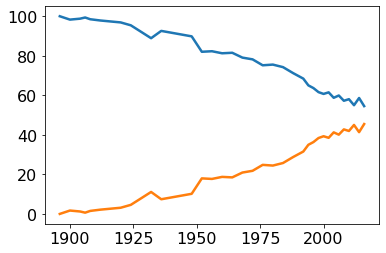

In [14]:
# Number (and fractions) of men and women
years, fracM, fracF = np.zeros(shape=(35)), np.zeros(shape=(35)), np.zeros(shape=(35))
for i, (y, d)  in enumerate(df.groupby('Year')):
    years[i] = y
    for k, dd in d.groupby('Sex'):
        if   k=='F': fracF[i] = dd.size/d.size*100
        else       : fracM[i] = dd.size/d.size*100

plt.plot(years, fracM)
plt.plot(years, fracF);

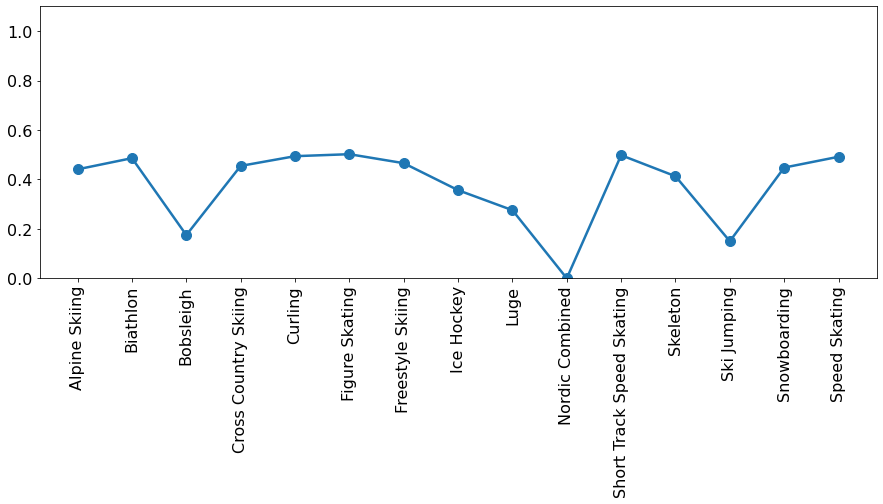

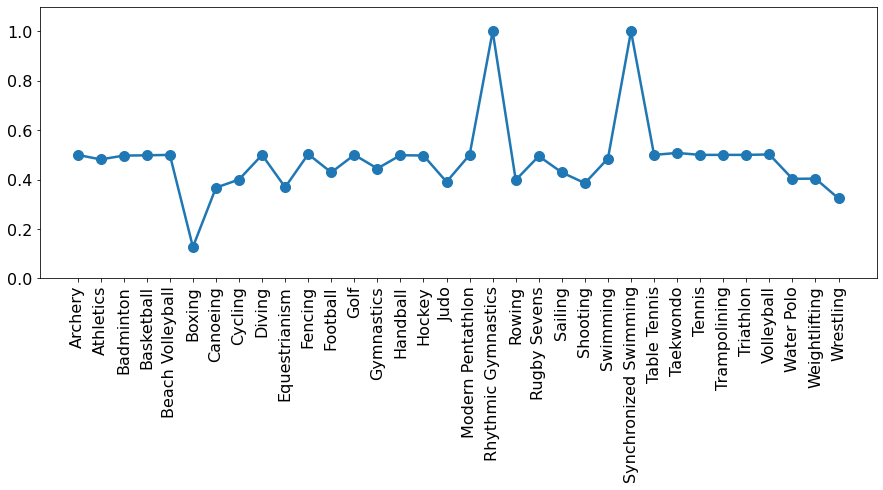

In [15]:
# Fraction men/women for each sport
for iy, year in enumerate([2014, 2016]):
    dfs = df[df['Year']==year]
    N = nUniqueVal(dfs, 'Sport')
    nWomen, nMen, sports= np.zeros(N), np.zeros(N), ['']*N
    for i, (s, d) in enumerate(dfs.groupby('Sport')):
        sports[i] = s
        for k, dd in d.groupby('Sex'):
            if   k=='F': nWomen[i] = dd.size/d.size*100
            else       : nMen[i]   = dd.size/d.size*100
    plt.figure(figsize=(15, 5))
    plt.plot(sports, nWomen/(nMen+nWomen), marker='o')
    plt.xticks(rotation=90)
    plt.ylim(0, 1.1)

**1.3. Medals.** In order to have a better overview of game winners, one can explore how the gold, sylver and bronze medals are distributed accross countries, sport, etc ... Produce the following plots:

 1. Histogram number of medals for men and women
 1. Which sport has more medals? Which sport has more medals and does it change with time?
 1. Number ouf countries versus time? gold/silver/bronze for each across countries? does it change with time?
 
*HINT:* it may be useful to create categorical variable assicated to the type of won medal.

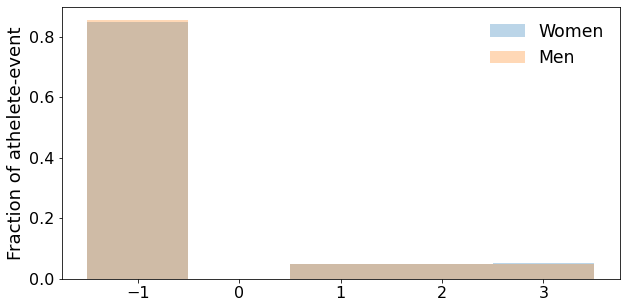

In [16]:
# Make a categorical variable for the 3 medals
medals   = df['Medal'].astype(np.str)
isGold   = medals == 'Gold'
isSilver = medals == 'Silver'
isBronze = medals == 'Bronze'
noMedal  = medals == 'nan'
df['catMed'] = isGold*1 + isSilver*2 + isBronze*3 + noMedal*(-1)

# Number of medals
plt.figure(figsize=(10, 5))
hist_style = {'alpha': 0.3, 'bins': [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5], 'density': True}
plt.hist(df[df['Sex']=='F']['catMed'], label='Women', **hist_style)
plt.hist(df[df['Sex']=='M']['catMed'], label='Men'  , **hist_style)
plt.ylabel('Fraction of athelete-event')
plt.legend();

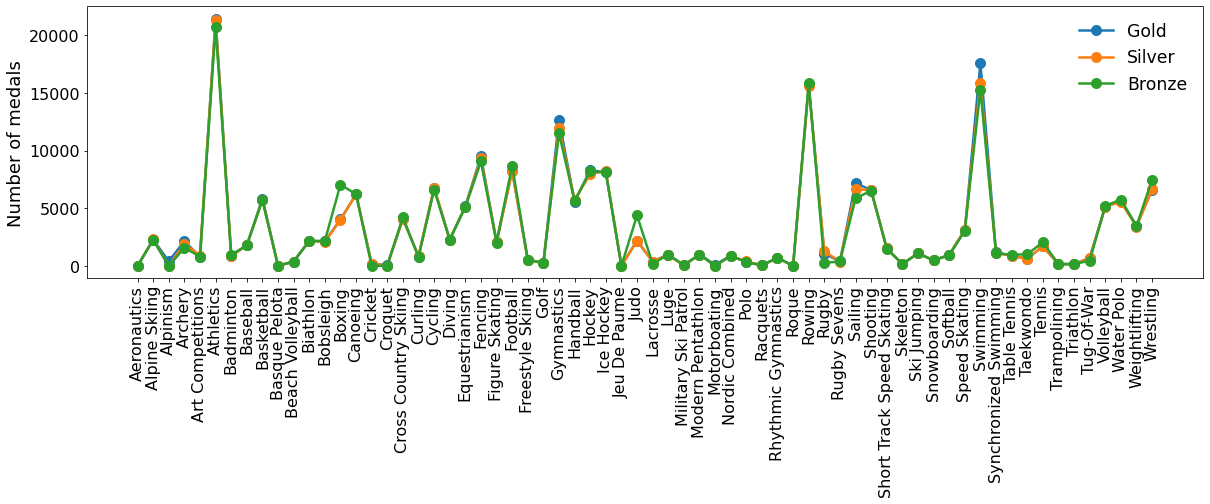

In [17]:
# Number of medals per sport
N = nUniqueVal(df, 'Sport')
sports = ['']*N
nGold, nSilver, nBronze = np.zeros(N), np.zeros(N),  np.zeros(N)
for i, (s, d) in enumerate(df.groupby('Sport')):
    sports[i] = s
    for k, dd in d.groupby('Medal'):
        if k=='Gold'   : nGold[i]   = dd.size
        if k=='Silver' : nSilver[i] = dd.size
        if k=='Bronze' : nBronze[i] = dd.size
            
plt.figure(figsize=(20, 5))
plt.plot(sports, nGold  , label='Gold'  , marker='o')
plt.plot(sports, nSilver, label='Silver', marker='o')
plt.plot(sports, nBronze, label='Bronze', marker='o')
plt.xticks(rotation=90)
plt.ylabel('Number of medals')
plt.legend();

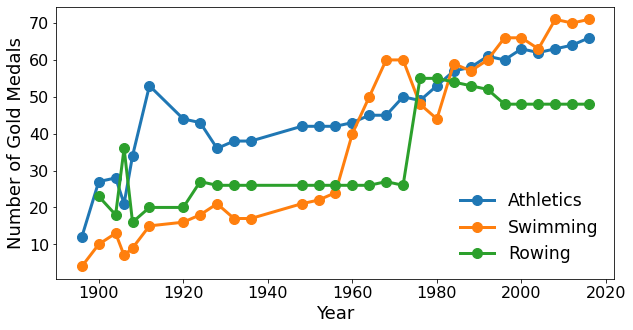

In [18]:
# Number of gold medal for the sport with highest number of medals, versus time
sport_list = ['Athletics', 'Swimming', 'Rowing']
plt.figure(figsize=(10, 5))
for sName in sport_list:
    this_df = df[df['Sport']==sName]
    Nyears = nUniqueVal(this_df, 'Year')
    nGold  = np.zeros(shape=(Nyears))
    Years  = np.zeros(shape=(Nyears))
    for i, (y, dd) in enumerate(this_df.groupby('Year')):
        Years[i] = y
        nGold[i] = np.sum(dd['Medal']=='Gold')
    plt.plot(Years, nGold, linewidth=3, markersize=10, marker='o', label=sName);
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals');

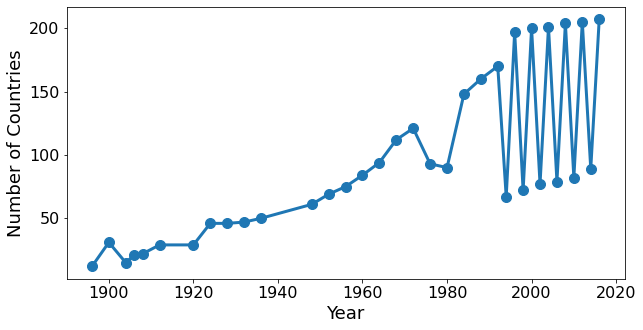

In [19]:
# Number of countries per year
Nyears = nUniqueVal(df, 'Year')
nCountries = np.zeros(shape=(Nyears))
Years = np.zeros(shape=(Nyears))

for i, (y, d) in enumerate(df.groupby('Year')):
    Years[i] = y
    nCountries[i] = nUniqueVal(d, 'NOC')

plt.figure(figsize=(10, 5))
plt.plot(Years, nCountries, linewidth=3, markersize=10, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Countries');

In [20]:
# Number of medails per country
def plot_n_medail_country(data):
    
    '''
    Rank the country with decreasing number of gold medals
    and plot the number of gold/silver/bronze medals for
    each country, up to the 50th. The only argument `data` 
    is a panda dataframe.
    '''
    
    N = nUniqueVal(data, 'NOC')
    countries = ['']*N
    nGold, nSilver, nBronze = np.zeros(N), np.zeros(N),  np.zeros(N)
    for i, (c, d) in enumerate(data.groupby('NOC')):
        countries[i] = c
        for k, dd in d.groupby('Medal'):
            if k=='Gold'   : nGold[i]   = dd.size
            if k=='Silver' : nSilver[i] = dd.size
            if k=='Bronze' : nBronze[i] = dd.size

    # Convert into np.array
    countries = np.array(countries)

    # Rank coutries according to the higest gold medal
    idx_sort = np.argsort(nGold)[:-50:-1]

    # Plot the result
    plt.figure(figsize=(20, 5))
    plt.plot(countries[idx_sort], nGold[idx_sort]  , marker='o', label='Gold')
    plt.plot(countries[idx_sort], nSilver[idx_sort], marker='o', label='Silver')
    plt.plot(countries[idx_sort], nBronze[idx_sort], marker='o', label='Bronze')
    plt.xticks(rotation=90)
    plt.legend();

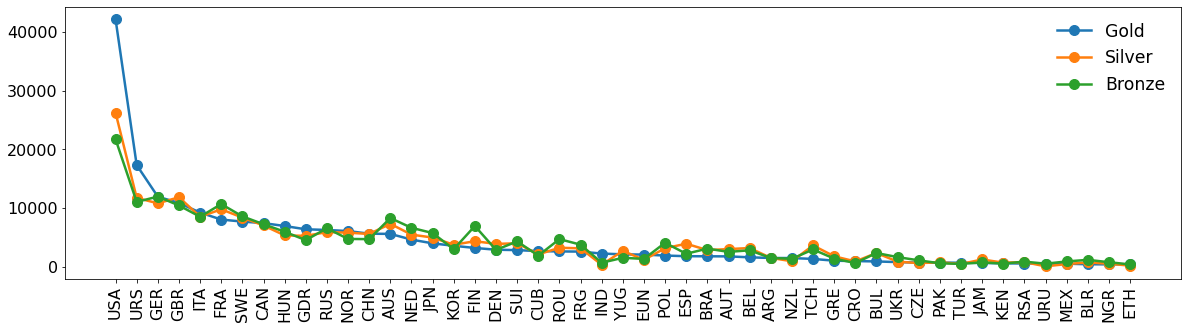

In [21]:
# Inclusive
plot_n_medail_country(df)

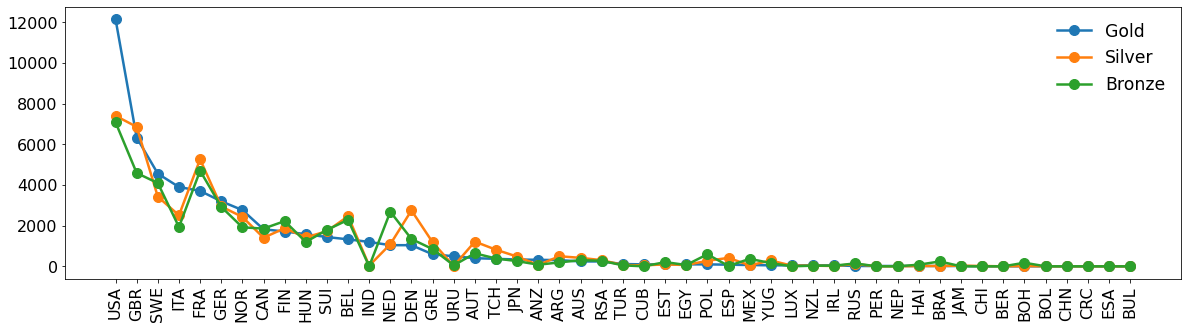

In [22]:
# Before 50's
plot_n_medail_country(df[df['Year']<1950])

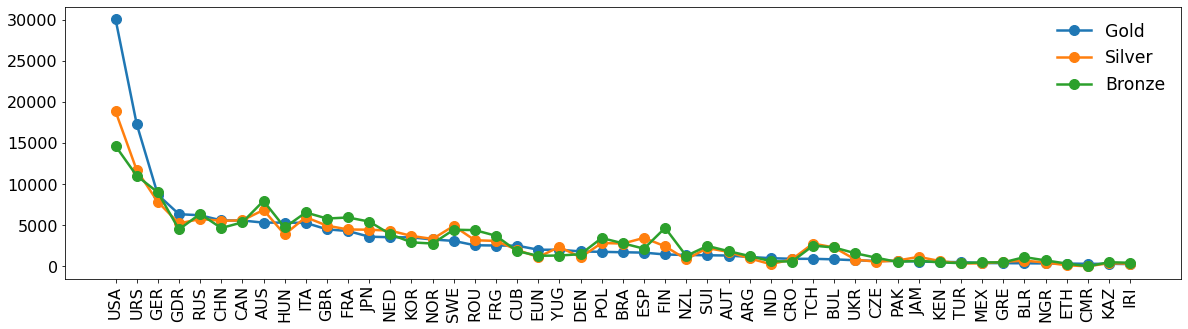

In [23]:
# After 50's
plot_n_medail_country(df[df['Year']>1950])

## 2. Modelling the correlation between height and weight (7pts)


**2.1** Define analytical function `model_height(weight, *params)` that would well describe the average behaviour of heights *v.s* weights. This function will have some free parameters `*params` to be latter adjusted. 

**2.2** Define bins of weights, for each bin compute the averaged weight and the average height. Store them into two arrays, `meanW` and `meanH`.

**2.3** Define a cost function of your choice, quantifiying the difference between the function predicting the average weights and the observed average weights, for all heights.

**2.4** Using `scipy.minimize` function, find set of parameters `*params` that minimize the cost function.

**2.5** Overlay on the same plot: the cloud of points, the computed average and the predicted average. Wat do you conclude about your choice of analytical function?

**2.6** Repeat the exercise with this binning `[25, 75, 125, 250]` and this function $h(w) = p_0 + p_1 x$, just to get a result to be compared with others.

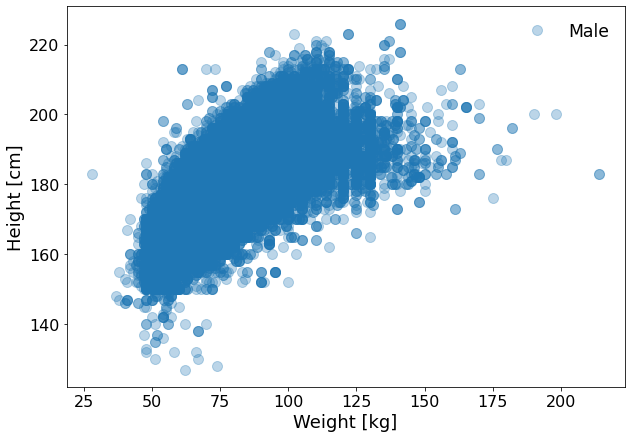

In [24]:
# Get data only for Women and men
dfW, dfM = df[df.Sex=='F'], df[df.Sex=='M']
ww, hw = dfW.Weight, dfW.Height
wm, hm = dfM.Weight, dfM.Height

# Produce the plot
plt.figure(figsize=(10, 7))
plt.plot(wm, hm, alpha=0.3, label='Male', linewidth=0, marker='o')
plt.xlabel('Weight [kg]')
plt.ylabel('Height [cm]')
plt.legend();

In [25]:
# Compute central value / RMS for few weight interval

## 3. Building a predictive model (bonus)

1. Define two populations, athelete-event with and without a medal, and plot few key distributions for these two population.

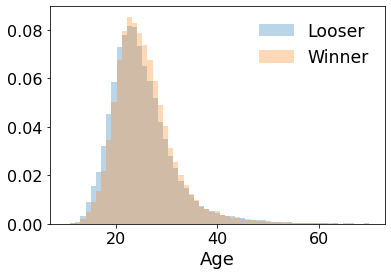

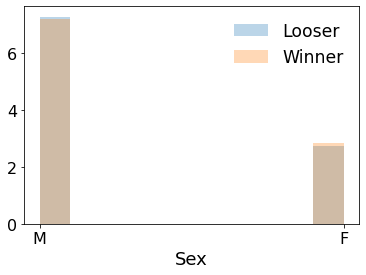

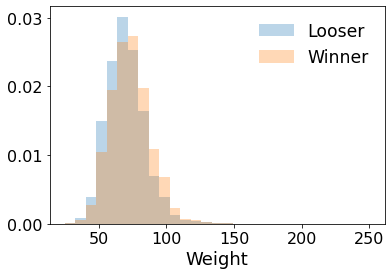

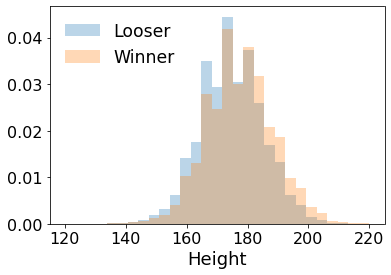

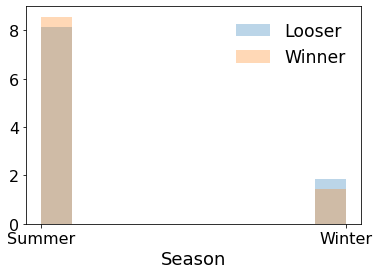

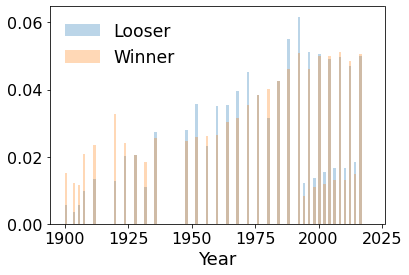

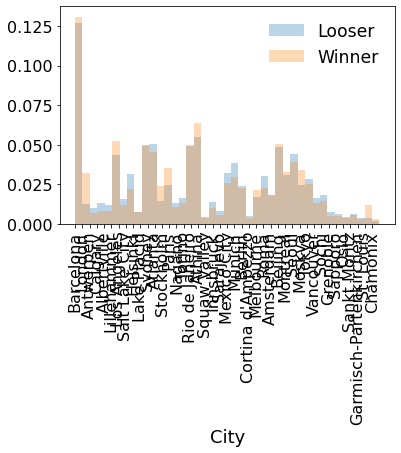

In [26]:
# Add population type information
df['win'] = df.Medal.astype(np.str) != 'nan'
catName = {True: 'Winner', False: 'Looser'}

# Variables and Binnings
cols = ['Age', 'Sex', 'Weight', 'Height', 'Season', 'Year', 'City']
binnings = [
    np.linspace(  10,  70,  60),   # Age
    None,                         # Sex
    np.linspace( 25, 250, 30),    # Weight
    np.linspace(120, 220, 30),    # Height
    None,                         # Season
    np.linspace(1900, 2020, 120), # Year
    np.linspace(0, nUniqueVal(df, 'City'), nUniqueVal(df, 'City')),
]

# Plot the distributions for each of them
for col, bining in zip(cols, binnings):
    plt.figure()
    for k, d in df.groupby('win'):
        plt.hist(d[col], label=catName[k], alpha=0.3, density=True, bins=bining)
    plt.xlabel(col)
    plt.legend()
    if col=='City': plt.xticks(rotation=90)

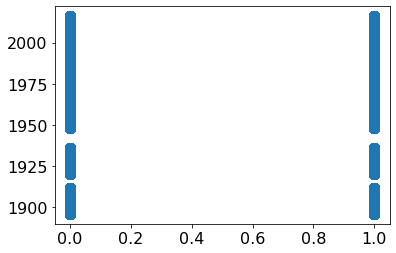

In [27]:
plt.scatter(df['win'], df['Year']);